# Sambaan Explanation

In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import mean, std
from sklearn import metrics, preprocessing
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, make_scorer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the titanic dataset
df = pd.read_csv('titanic.csv')

In [3]:
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# Describes the dataset
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
# Sums the missing values of the default dataset
df.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [6]:
# This function encodes non integer/float datatypes into an incremental value
le = preprocessing.LabelEncoder()

def encode(data):
    cols = ['sex', 'cabin', 'embarked', 'boat']
    for col in cols:
        le.fit(data[col])
        data[col] = le.transform(df[col])
        # data[col] = le.inverse_transform(df[col])
    return data

In [7]:
# Process the dataset into the encode function
data = encode(df)

In [8]:
# This function cleans
def clean(data):
    data = data.drop(['name', 'ticket', 'home.dest'], axis=1)
    
    cols = ['age', 'cabin', 'embarked', 'body']
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
    return data

In [9]:
# Process the encoded dataset into the clean function
data = clean(data)

In [10]:
# Sums the missing values after the encode and clean function
data.isna().sum()

pclass      1
survived    1
sex         0
age         0
sibsp       1
parch       1
fare        2
cabin       0
embarked    0
boat        0
body        0
dtype: int64

In [11]:
# Because there are still missing values we will use forward fill
# This will fill almost all missing values
# Lastly we will use backward fill
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

In [12]:
# And now our dataset is clean and ready to be splitted
data.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
boat        0
body        0
dtype: int64

In [13]:
# Split the dataset into x = independent variables, y = dependent/target variables
x = data.drop(['survived'], axis=1)
y = data[['survived']]

In [14]:
# Hold-out set = 70/30 or test size of 30%
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.3)

# DTC

In [15]:
# DTC model
dtc = DecisionTreeClassifier()
dtc.fit(trainX, trainY.values.ravel())

DecisionTreeClassifier()

In [16]:
y_predicted = dtc.predict(testX)

In [17]:
conf = confusion_matrix(testY, y_predicted)

In [18]:
tp = conf[0][0]
fn = conf[0][1]
fp = conf[1][0]
tn = conf[1][1]

precision = tp/(tp+fp)
accuracy = (tp+tn)/(tp+fn+fp+tn)
recall = tp/(tp+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tp+tn)
f1 = 2*(precision*recall)/(precision+recall)
dtcres = precision, accuracy, recall, sensitivity, specificity, f1
dtcpre, dtcacc, dtcrec, dtcsen, dtcspe, dtcf1 = precision, accuracy, recall, sensitivity, specificity, f1
precision, accuracy, recall, sensitivity, specificity, f1

(0.9672131147540983,
 0.9643765903307888,
 0.9752066115702479,
 0.9752066115702479,
 0.37730870712401055,
 0.9711934156378601)

# NB

In [19]:
nb = GaussianNB()
nb.fit(trainX, trainY.values.ravel())

GaussianNB()

In [20]:
y_predicted = nb.predict(testX)

In [21]:
conf = confusion_matrix(testY, y_predicted)

In [22]:
tp = conf[0][0]
fn = conf[0][1]
fp = conf[1][0]
tn = conf[1][1]

precision = tp/(tp+fp)
accuracy = (tp+tn)/(tp+fn+fp+tn)
recall = tp/(tp+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tp+tn)
f1 = 2*(precision*recall)/(precision+recall)
nbres = precision, accuracy, recall, sensitivity, specificity, f1
nbpre, nbacc, nbrec, nbsen, nbspe, nbf1 = precision, accuracy, recall, sensitivity, specificity, f1
precision, accuracy, recall, sensitivity, specificity, f1

(1.0,
 0.49363867684478374,
 0.17768595041322313,
 0.17768595041322313,
 0.7783505154639175,
 0.3017543859649123)

# RFC

In [23]:
rfc = RandomForestClassifier()
rfc.fit(trainX, trainY.values.ravel())

RandomForestClassifier()

In [24]:
y_predicted = rfc.predict(testX)

In [25]:
conf = confusion_matrix(testY, y_predicted)

In [26]:
tp = conf[0][0]
fn = conf[0][1]
fp = conf[1][0]
tn = conf[1][1]

precision = tp/(tp+fp)
accuracy = (tp+tn)/(tp+fn+fp+tn)
recall = tp/(tp+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tp+tn)
f1 = 2*(precision*recall)/(precision+recall)
rfcres = precision, accuracy, recall, sensitivity, specificity, f1
rfcpre, rfcacc, rfcrec, rfcsen, rfcspe, rfcf1 = precision, accuracy, recall, sensitivity, specificity, f1
precision, accuracy, recall, sensitivity, specificity, f1

(0.9676113360323887,
 0.9720101781170484,
 0.987603305785124,
 0.987603305785124,
 0.3743455497382199,
 0.9775051124744376)

# KNN

In [27]:
knn = KNeighborsClassifier()
knn.fit(trainX, trainY.values.ravel())

KNeighborsClassifier()

In [28]:
y_predicted = knn.predict(testX)

In [29]:
conf = confusion_matrix(testY, y_predicted)

In [30]:
tp = conf[0][0]
fn = conf[0][1]
fp = conf[1][0]
tn = conf[1][1]

precision = tp/(tp+fp)
accuracy = (tp+tn)/(tp+fn+fp+tn)
recall = tp/(tp+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tp+tn)
f1 = 2*(precision*recall)/(precision+recall)
knnres = precision, accuracy, recall, sensitivity, specificity, f1
knnpre, knnacc, knnrec, knnsen, knnspe, knnf1 = precision, accuracy, recall, sensitivity, specificity, f1
precision, accuracy, recall, sensitivity, specificity, f1

(0.9032258064516129,
 0.8931297709923665,
 0.9256198347107438,
 0.9256198347107438,
 0.36182336182336183,
 0.9142857142857143)

# LR

In [31]:
# lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr = LogisticRegression(max_iter=1000)
lr.fit(trainX, trainY.values.ravel())

LogisticRegression(max_iter=1000)

In [32]:
y_predicted = lr.predict(testX)

In [33]:
conf = confusion_matrix(testY, y_predicted)

In [34]:
tp = conf[0][0]
fn = conf[0][1]
fp = conf[1][0]
tn = conf[1][1]

precision = tp/(tp+fp)
accuracy = (tp+tn)/(tp+fn+fp+tn)
recall = tp/(tp+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tp+tn)
f1 = 2*(precision*recall)/(precision+recall)
lrres = precision, accuracy, recall, sensitivity, specificity, f1
lrpre, lracc, lrrec, lrsen, lrspe, lrf1 = precision, accuracy, recall, sensitivity, specificity, f1
precision, accuracy, recall, sensitivity, specificity, f1

(0.9523809523809523,
 0.9643765903307888,
 0.9917355371900827,
 0.9917355371900827,
 0.36675461741424803,
 0.97165991902834)

# Tabled Results

In [35]:
# Dataframed result of the models performance
results = [("DTC", dtcpre, dtcacc, dtcrec, dtcsen, dtcspe, dtcf1),
          ("NB", nbpre, nbacc, nbrec, nbsen, nbspe, nbf1),
          ("RFC", rfcpre, rfcacc, rfcrec, rfcsen, rfcspe, rfcf1),
          ("KNN", knnpre, knnacc, knnrec, knnsen, knnspe, knnf1),
          ("LR", lrpre, lracc, lrrec, lrsen, lrspe, lrf1)]
          
pd.options.display.float_format = '{:,.2f}'.format
dtable1 = pd.DataFrame(results, columns = ['MODEL', 'Precision', 'Accuracy', 'Recall', 'Sensitivity', 'Specificity', 'F1-Score'])
# dtable1.sort_values(by=['Accuracy'], ascending=False)
dtable1

,MODEL,Precision,Accuracy,Recall,Sensitivity,Specificity,F1-Score
0,DTC,0.97,0.96,0.98,0.98,0.38,0.97
1,NB,1.00,0.49,0.18,0.18,0.78,0.30
2,RFC,0.97,0.97,0.99,0.99,0.37,0.98
3,KNN,0.90,0.89,0.93,0.93,0.36,0.91
4,LR,0.95,0.96,0.99,0.99,0.37,0.97


# Cagubcub Explanation

# K-Fold
# n = 10

In [36]:
# K-Fold initialization with k=10 as splits
cv = KFold(n_splits=10, random_state=1, shuffle=True)
specificityScorer = make_scorer(recall_score, pos_label=0)

# Cross-validation

In [37]:
# DTC
dtcPreScore = cross_val_score(dtc, x, y, scoring='precision', cv=cv, n_jobs=-1)
dtcAccScore = cross_val_score(dtc, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
dtcRecScore = cross_val_score(dtc, x, y, scoring='recall', cv=cv, n_jobs=-1)
dtcSpeScore = cross_val_score(dtc, x, y, scoring=specificityScorer, cv=cv, n_jobs=-1)
dtcF1Score = cross_val_score(dtc, x, y, scoring='f1', cv=cv, n_jobs=-1)
dtcCVRes = dtcPreScore, dtcAccScore, dtcRecScore, dtcSpeScore, dtcF1Score

In [38]:
# NB
nbPreScore = cross_val_score(nb, x, y, scoring='precision', cv=cv, n_jobs=-1)
nbAccScore = cross_val_score(nb, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
nbRecScore = cross_val_score(nb, x, y, scoring='recall', cv=cv, n_jobs=-1)
nbSpeScore = cross_val_score(nb, x, y, scoring=specificityScorer, cv=cv, n_jobs=-1)
nbF1Score = cross_val_score(nb, x, y, scoring='f1', cv=cv, n_jobs=-1)
nbCVRes =  nbPreScore, nbAccScore, nbRecScore, nbSpeScore, nbF1Score

In [39]:
# RFC
rfcPreScore = cross_val_score(rfc, x, y, scoring='precision', cv=cv, n_jobs=-1)
rfcAccScore = cross_val_score(rfc, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
rfcRecScore = cross_val_score(rfc, x, y, scoring='recall', cv=cv, n_jobs=-1)
rfcSpeScore = cross_val_score(rfc, x, y, scoring=specificityScorer, cv=cv, n_jobs=-1)
rfcF1Score = cross_val_score(rfc, x, y, scoring='f1', cv=cv, n_jobs=-1)
rfcCVRes =  rfcPreScore, rfcAccScore, rfcRecScore, rfcSpeScore, rfcF1Score

In [40]:
# KNN
knnPreScore = cross_val_score(knn, x, y, scoring='precision', cv=cv, n_jobs=-1)
knnAccScore = cross_val_score(knn, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
knnRecScore = cross_val_score(knn, x, y, scoring='recall', cv=cv, n_jobs=-1)
knnSpeScore = cross_val_score(knn, x, y, scoring=specificityScorer, cv=cv, n_jobs=-1)
knnF1Score = cross_val_score(knn, x, y, scoring='f1', cv=cv, n_jobs=-1)
knnCVRes =  knnPreScore, knnAccScore, knnRecScore, knnSpeScore, knnF1Score

In [41]:
# LR
lrPreScore = cross_val_score(lr, x, y, scoring='precision', cv=cv, n_jobs=-1)
lrAccScore = cross_val_score(lr, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
lrRecScore = cross_val_score(lr, x, y, scoring='recall', cv=cv, n_jobs=-1)
lrSpeScore = cross_val_score(lr, x, y, scoring=specificityScorer, cv=cv, n_jobs=-1)
lrF1Score = cross_val_score(lr, x, y, scoring='f1', cv=cv, n_jobs=-1)
lrCVRes =  lrPreScore, lrAccScore, lrRecScore, lrSpeScore, lrF1Score

# K-Fold Cross Validation Results

In [42]:
# Dataframed results of the cross-validated model performance
scores = [("DTC", mean(dtcCVRes[0]), mean(dtcCVRes[1]), mean(dtcCVRes[2]), mean(dtcCVRes[3]), mean(dtcCVRes[4])),
          ("NB", mean(nbCVRes[0]), mean(nbCVRes[1]), mean(nbCVRes[2]), mean(nbCVRes[3]), mean(nbCVRes[4])),
          ("RFC", mean(rfcCVRes[0]), mean(rfcCVRes[1]), mean(rfcCVRes[2]), mean(rfcCVRes[3]), mean(rfcCVRes[4])),
          ("KNN", mean(knnCVRes[0]), mean(knnCVRes[1]), mean(knnCVRes[2]), mean(knnCVRes[3]), mean(knnCVRes[4])),
          ("LR", mean(lrCVRes[0]), mean(lrCVRes[1]), mean(lrCVRes[2]), mean(lrCVRes[3]), mean(lrCVRes[4]))]

pd.options.display.float_format = '{:.2f}'.format
dtable2 = pd.DataFrame(scores, columns = ['MODEL', 'Precision', 'Accuracy', 'Recall/Sensitivity', 'Specificity', 'F1-Score'])
# dtable2.sort_values(by=['Precision'], ascending=False)
dtable2

,MODEL,Precision,Accuracy,Recall/Sensitivity,Specificity,F1-Score
0,DTC,0.95,0.96,0.95,0.97,0.95
1,NB,0.43,0.50,1.00,0.20,0.60
2,RFC,0.97,0.97,0.96,0.98,0.96
3,KNN,0.87,0.89,0.85,0.92,0.86
4,LR,0.98,0.96,0.90,0.99,0.94


# Compared Results

In [43]:
# Without cross-validation
dtable1

,MODEL,Precision,Accuracy,Recall,Sensitivity,Specificity,F1-Score
0,DTC,0.97,0.96,0.98,0.98,0.38,0.97
1,NB,1.00,0.49,0.18,0.18,0.78,0.30
2,RFC,0.97,0.97,0.99,0.99,0.37,0.98
3,KNN,0.90,0.89,0.93,0.93,0.36,0.91
4,LR,0.95,0.96,0.99,0.99,0.37,0.97


In [44]:
# With cross-validation
dtable2

,MODEL,Precision,Accuracy,Recall/Sensitivity,Specificity,F1-Score
0,DTC,0.95,0.96,0.95,0.97,0.95
1,NB,0.43,0.50,1.00,0.20,0.60
2,RFC,0.97,0.97,0.96,0.98,0.96
3,KNN,0.87,0.89,0.85,0.92,0.86
4,LR,0.98,0.96,0.90,0.99,0.94


# Graphical Presentations

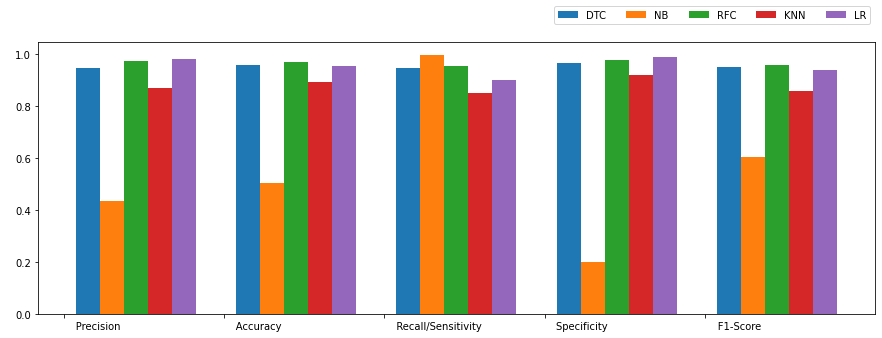

In [45]:
# Overall Model Scores by Performance
performance = ['                      Precision', '                      Accuracy', '                                   Recall/Sensitivity', '                        Specificity', '                      F1-Score']
DTC = scores[0][1:]
NB = scores[1][1:]
RFC = scores[2][1:]
KNN = scores[3][1:]
LR = scores[4][1:]
x_axis = np.arange(len(performance))

plt.figure(figsize=(15,5))
plt.bar(x_axis +0.15, DTC, width=0.15, label = 'DTC')
plt.bar(x_axis +0.15*2, NB, width=0.15, label = 'NB')
plt.bar(x_axis +0.15*3, RFC, width=0.15, label = 'RFC')
plt.bar(x_axis +0.15*4, KNN, width=0.15, label = 'KNN')
plt.bar(x_axis +0.15*5, LR, width=0.15, label = 'LR')

plt.xticks(x_axis, performance)

# plt.legend(loc='lower right')
plt.legend(bbox_to_anchor =(1, 1.15), ncol = 5)

plt.show()


# Individual Presentations by Performance

Text(0.5, 0, 'Model')

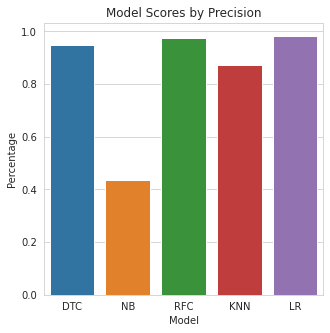

In [46]:
# Model Scores by Precision
sns.set_style('whitegrid')
fig, axis = plt.subplots(figsize=(5,5))
sns.barplot(x='MODEL', y='Precision', data=dtable2, ax=axis, ci=None)
axis.set_title('Model Scores by Precision')
loc, labels = plt.xticks()
plt.xticks(loc, ['DTC', 'NB', 'RFC', 'KNN', 'LR'])
axis.set_ylabel('Percentage')
axis.set_xlabel('Model')

Text(0.5, 0, 'Model')

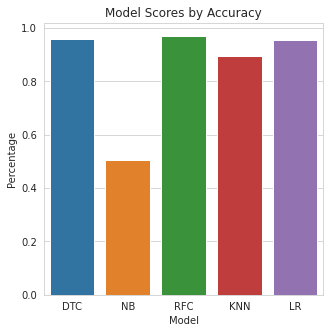

In [47]:
# Model Scores by Accuracy
sns.set_style('whitegrid')
fig, axis = plt.subplots(figsize=(5,5))
sns.barplot(x='MODEL', y='Accuracy', data=dtable2, ax=axis, ci=None)
axis.set_title('Model Scores by Accuracy')
loc, labels = plt.xticks()
plt.xticks(loc, ['DTC', 'NB', 'RFC', 'KNN', 'LR'])
axis.set_ylabel('Percentage')
axis.set_xlabel('Model')

Text(0.5, 0, 'Model')

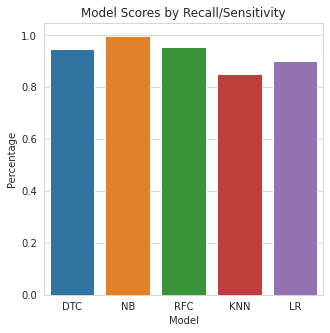

In [48]:
# Model Scores by Recall/Sensitivity
sns.set_style('whitegrid')
fig, axis = plt.subplots(figsize=(5,5))
sns.barplot(x='MODEL', y='Recall/Sensitivity', data=dtable2, ax=axis, ci=None)
axis.set_title('Model Scores by Recall/Sensitivity')
loc, labels = plt.xticks()
plt.xticks(loc, ['DTC', 'NB', 'RFC', 'KNN', 'LR'])
axis.set_ylabel('Percentage')
axis.set_xlabel('Model')

Text(0.5, 0, 'Model')

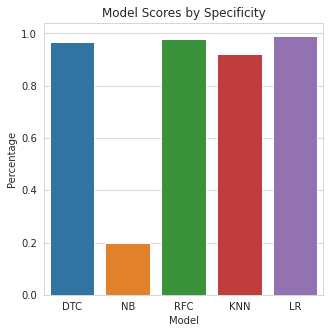

In [49]:
# Model Scores by Specificity
sns.set_style('whitegrid')
fig, axis = plt.subplots(figsize=(5,5))
sns.barplot(x='MODEL', y='Specificity', data=dtable2, ax=axis, ci=None)
axis.set_title('Model Scores by Specificity')
loc, labels = plt.xticks()
plt.xticks(loc, ['DTC', 'NB', 'RFC', 'KNN', 'LR'])
axis.set_ylabel('Percentage')
axis.set_xlabel('Model')

Text(0.5, 0, 'Model')

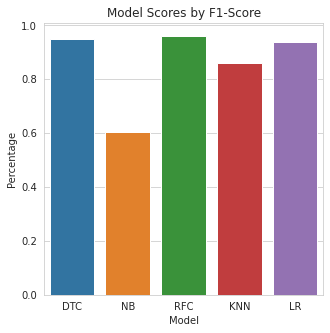

In [50]:
# Model Scores by F1-Score
sns.set_style('whitegrid')
fig, axis = plt.subplots(figsize=(5,5))
sns.barplot(x='MODEL', y='F1-Score', data=dtable2, ax=axis, ci=None)
axis.set_title('Model Scores by F1-Score')
loc, labels = plt.xticks()
plt.xticks(loc, ['DTC', 'NB', 'RFC', 'KNN', 'LR'])
axis.set_ylabel('Percentage')
axis.set_xlabel('Model')